In [523]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

In [543]:
df_D = pd.read_csv('D.csv')
df_F = pd.read_csv('F.csv')

In [544]:
D = df_D.values
F = df_F.values
dim = np.shape(D)

In [545]:
n_timesteps, n_nodes = np.shape(D)
x = np.linspace(0,1,n_nodes)

In [546]:
#ignore rotations and moments
'''
F = FM[:,0:int(dim[1]/2)]
F = F[:,0::2]
F = F/F.max()
D = FM[:,int(dim[1]/2):] 
D = D[:,0::2]
D = D/D.max()
'''

'\nF = FM[:,0:int(dim[1]/2)]\nF = F[:,0::2]\nF = F/F.max()\nD = FM[:,int(dim[1]/2):] \nD = D[:,0::2]\nD = D/D.max()\n'

In [547]:
#Training data

n_timesteps, n_nodes = np.shape(D)
d = 10 #number of steps in "model memory"
t = d

X_train = np.zeros([n_timesteps-d, 2*d*n_nodes+n_nodes])
Y_train = np.zeros([n_timesteps-d, n_nodes])


for i in range(n_timesteps-d):
    
    bulk = 0
    for j in range(n_nodes-1):
        X_train[i, bulk:bulk + d+1] = F[t-d:t+1,j]    
        bulk += d+1
    
    for j in range(n_nodes):
        X_train[i, bulk:bulk + d] = D[t-d:t,j]
        bulk += d
    
    #for j in range(n_nodes):
     #   X_train[i, bulk: bulk + d] = Dt[t-d:t,j]/rt_max
      #  bulk += d

    Y_train[i, 0:n_nodes] = D[t, :]
    #Y_train[i, n_nodes:] = Dt[i, :]/rt_max
    t += 1


In [548]:
np.shape(F)

(1000, 20)

In [549]:
def get_error(predictions, y_test):
    #Total error
    error = tf.convert_to_tensor(0, dtype=tf.float64)
    for i in range(len(predictions[:,0])):
        #for j in range(d):
        #error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
        error += K.mean(K.square(predictions - y_test), axis=-1)
    
    return error

In [550]:
#Custom loss function

def independent_loss(y_true, y_pred):
    
    #independent prediction

    input_i = np.copy(x_train[0,:])

    dz = np.copy(input_i[(d+1)*n_nodes:])

    dz = np.reshape(dz, (n_nodes, d))


    #dzt = np.copy(input_i[d+1+n_nodes*d:])
    #dzt = np.reshape(dzt, (n_nodes, d))

    preds = np.zeros([len(x_train[:,0])-1, n_nodes])
    force = np.copy(x_train[:, 0:(d+1)*n_nodes])

    for i in range(len(x_train[:,0])-1):


        pred = model.predict(np.reshape(input_i,(1,len(input_i))))
        preds[i, :] = pred

        input_i[0:(d+1)*n_nodes] = force[i+1,:]

        dz = np.delete(dz, 0, 1)
        dz = np.concatenate((dz, np.reshape(pred[0,:], (1,n_nodes)).T), axis=1)
        dz[0,:] = np.zeros(d)
        #dzt = np.delete(dzt, 0, 1)
        #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
        #dzt[0,:] = np.zeros(n_nodes)
        input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
        #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]

    #total_error = get_error(preds, y_train[:-1,:])
    #y_pred = tf.convert_to_tensor(np.float32(preds[0,:]))
    y_tr = tf.convert_to_tensor(np.float32(y_train[0,:]))
    #total_error = mean_squared_error(preds, y_tr)
    #print(total_error)
    total_error = mean_squared_error(y_true, y_pred)
    print(total_error)
    print(y_true)
    print(y_tr)
    return total_error #tf.convert_to_tensor(total_error, dtype=tf.float64)

In [551]:
def independent_loss(y_true, y_pred):
    #a = model.predict(x_train)
    y_pred = tf.convert_to_tensor(preds)
    print(type(tf.convert_to_tensor(preds[0,:])))
    total_error = mean_squared_error(y_true, y_pred)
    print(type(y_true))
    print(y_pred)
    print(type(total_error))
    
    #tf.Session().run(y_pred)
    return total_error

In [552]:
from keras import backend as K

In [553]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [554]:
#Neural network

train_portion = 0.8
input_dim = len(X_train[0,:])
output_dim = len(Y_train[0,:])

x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

def baseline_model():
    model = Sequential()
    height = 120
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    #model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model



# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=200, verbose = 1)

Epoch 1/200
800/800 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 2/200
800/800 [==============================] - 0s 150us/step - loss: 3.7819e-04
Epoch 3/200
800/800 [==============================] - 0s 177us/step - loss: 1.6084e-04
Epoch 4/200
800/800 [==============================] - 0s 155us/step - loss: 9.1246e-05
Epoch 5/200
800/800 [==============================] - 0s 149us/step - loss: 6.0224e-05
Epoch 6/200
800/800 [==============================] - 0s 158us/step - loss: 4.3555e-05
Epoch 7/200
800/800 [==============================] - 0s 228us/step - loss: 3.3205e-05
Epoch 8/200
800/800 [==============================] - 0s 242us/step - loss: 2.6143e-05
Epoch 9/200
800/800 [==============================] - 0s 231us/step - loss: 2.1042e-05
Epoch 10/200
800/800 [==============================] - 0s 242us/step - loss: 1.8309e-05
Epoch 11/200
800/800 [==============================] - 0s 160us/step - loss: 1.5180e-05
Epoch 12/200
800/800 [==============

800/800 [==============================] - 0s 128us/step - loss: 1.1157e-06
Epoch 94/200
800/800 [==============================] - 0s 134us/step - loss: 9.2940e-07
Epoch 95/200
800/800 [==============================] - 0s 125us/step - loss: 1.0636e-06
Epoch 96/200
800/800 [==============================] - 0s 128us/step - loss: 1.1926e-06
Epoch 97/200
800/800 [==============================] - 0s 125us/step - loss: 7.4999e-07
Epoch 98/200
800/800 [==============================] - 0s 125us/step - loss: 7.7613e-07
Epoch 99/200
800/800 [==============================] - 0s 129us/step - loss: 1.4184e-06
Epoch 100/200
800/800 [==============================] - 0s 140us/step - loss: 8.6524e-07
Epoch 101/200
800/800 [==============================] - 0s 137us/step - loss: 7.4073e-07
Epoch 102/200
800/800 [==============================] - 0s 148us/step - loss: 1.0160e-06
Epoch 103/200
800/800 [==============================] - 0s 134us/step - loss: 9.7776e-07
Epoch 104/200
800/800 [=======

800/800 [==============================] - 0s 133us/step - loss: 2.0154e-06
Epoch 185/200
800/800 [==============================] - 0s 124us/step - loss: 1.7836e-06
Epoch 186/200
800/800 [==============================] - 0s 128us/step - loss: 1.6111e-06
Epoch 187/200
800/800 [==============================] - 0s 132us/step - loss: 1.5498e-06
Epoch 188/200
800/800 [==============================] - 0s 130us/step - loss: 1.5742e-06
Epoch 189/200
800/800 [==============================] - 0s 125us/step - loss: 1.8494e-06
Epoch 190/200
800/800 [==============================] - 0s 120us/step - loss: 1.6766e-06
Epoch 191/200
800/800 [==============================] - 0s 128us/step - loss: 1.6181e-06
Epoch 192/200
800/800 [==============================] - 0s 143us/step - loss: 1.5273e-06
Epoch 193/200
800/800 [==============================] - 0s 169us/step - loss: 1.4682e-06
Epoch 194/200
800/800 [==============================] - 0s 135us/step - loss: 1.2440e-06
Epoch 195/200
800/800 [=

In [555]:
predictions = model.predict(x_test)

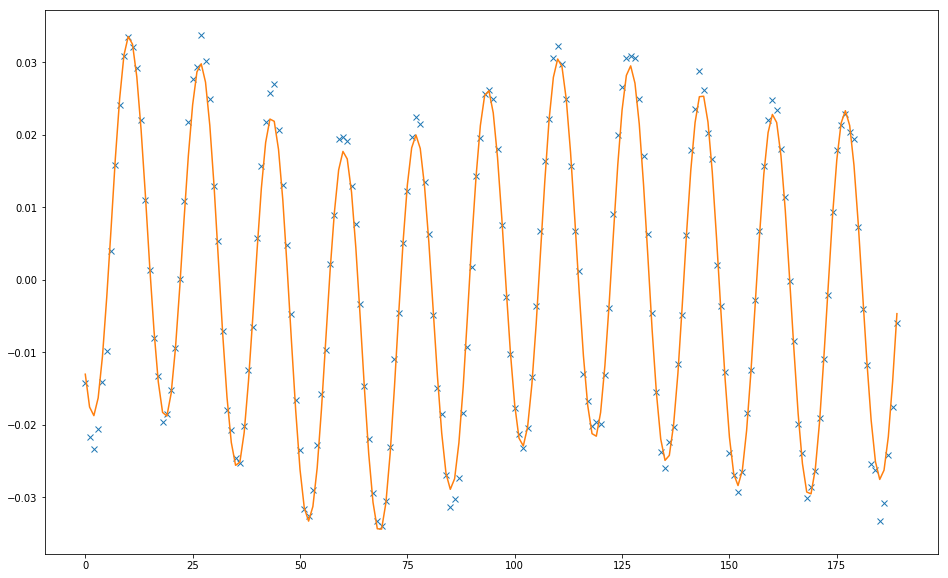

In [556]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,n_nodes-1], 'x')
plt.plot(y_test[:, n_nodes-1])
plt.show()

In [557]:
#Errorfunction
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [558]:
#Error
print(rmse(predictions[:,n_nodes-1], y_test[:,n_nodes-1]))

0.00223192501332


In [559]:
#Total error
error = 0
for i in range(len(predictions[:,0])):
    error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)

print(error)

0.000367009177308


In [560]:
#independent prediction

input_i = np.copy(x_test[0,:])

dz = np.copy(input_i[(d+1)*n_nodes:])

dz = np.reshape(dz, (n_nodes, d))


#dzt = np.copy(input_i[d+1+n_nodes*d:])
#dzt = np.reshape(dzt, (n_nodes, d))

preds = np.zeros([len(x_test[:,0])-1, n_nodes])
force = np.copy(x_test[:, 0:(d+1)*n_nodes])

for i in range(len(x_test[:,0])-1):
    
    
    pred = model.predict(np.reshape(input_i,(1,len(input_i))))
    preds[i, :] = pred
    
    input_i[0:(d+1)*n_nodes] = force[i+1,:]
    
    dz = np.delete(dz, 0, 1)
    dz = np.concatenate((dz, np.reshape(pred[0,:], (1,n_nodes)).T), axis=1)
    dz[0,:] = np.zeros(d)
    #dzt = np.delete(dzt, 0, 1)
    #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
    #dzt[0,:] = np.zeros(n_nodes)
    input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
    #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]
    

    

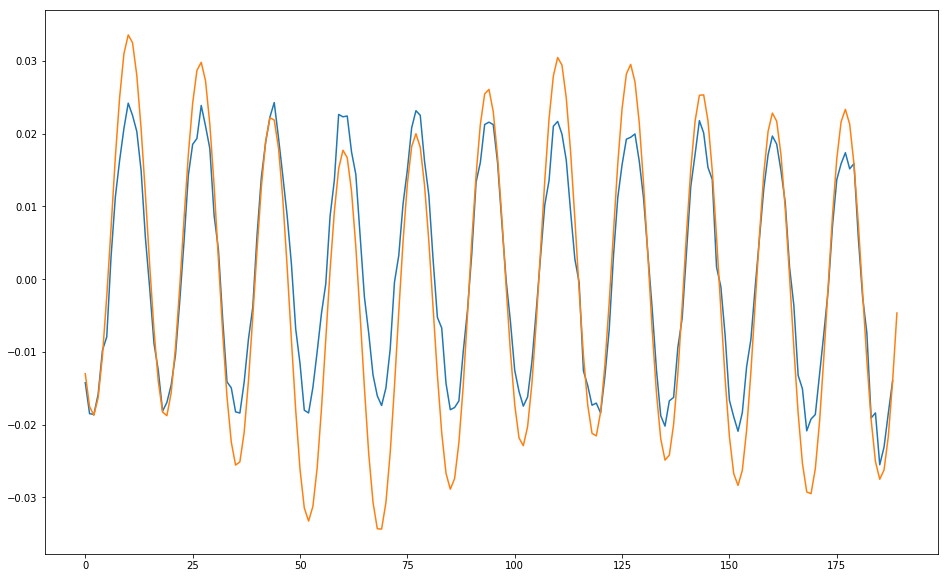

In [561]:
plt.figure(figsize=(16,10))
plt.plot(preds[:,n_nodes-1], '-')
plt.plot(y_test[:, n_nodes-1])
plt.show()

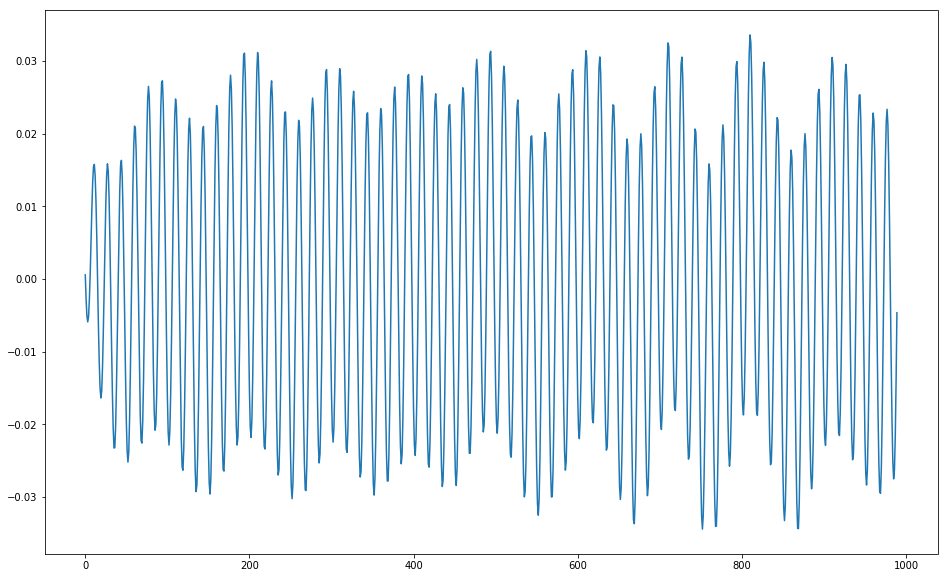

In [562]:
plt.figure(figsize=(16,10))
#plt.plot(preds[:,n_nodes-1], '-')
plt.plot(Y_train[:, n_nodes-1])
plt.show()

In [245]:
#Error
print(rmse(preds[:,n_nodes-1], y_test[:-1,n_nodes-1]))

0.0447303704962


In [246]:
#Total error
error = 0
for i in range(len(preds[:,0])):
    error += np.trapz((y_test[i,:] - preds[i,:])**2, x)

print(error)

4.23475192615


In [247]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")